In [ ]:
# Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read in csv for all universities
df = pd.read_csv('all_posts.csv')
df.shape

(2996, 7)

Social media tends to have a lot of memes/non-sensical discussion. For this project it would be valuable to filter out these types of posts and focus on posts that are more likely to have criticisms about the university.

In [65]:
# Want to see post flairs, and subsequently filter for non-shitposts
df['flair'].unique()

array(['Transfers', 'Discussion', 'Humour', 'Serious', 'News', 'Other',
       'Rant', 'Health', 'Clubs/Sports', 'Social', 'Event', 'Courses',
       'Waterloo #173', 'Academics', 'Advice', 'Confirmed', 'Meta', nan,
       'Shitpost', 'Lost & Found', 'Question', 'Politics', 'Life Advice',
       'Admissions', 'Finances', 'Programs', 'ACORN/Quercus/Outlook',
       'Free Speech', 'Waterloo #201–250', 'UTM/UTSC',
       "I'm in High School", 'Jobs', 'Photography & Art',
       'Pho(ur seasons)tography & Art', '@ SFU (Exception)', 'Megathread',
       'Congrats, you made it!', 'Photography &amp; Art',
       'Humour - Satire', 'SFU = Studying For UBC', 'Prose', '🍁',
       '100% super duper confirmed by the r/byssey', '🔥🔥🔥',
       'Ghost-type Humour', 'Unverified', 'Lost Dog', '🎉🎉🎉',
       'Read Comments Section for full context', 'Missing Person', 'F',
       'Spicy', 'HQ Post', 'Spicy Meme', 'We did it, reddit!',
       'HQ shitpost', 'Certified Dank', 'shitpost', 'Political',
       

In [66]:
# Most popular flairs
df['flair'].value_counts()[:10]

flair
Humour               961
Discussion           223
Other                159
Photography & Art    116
shitpost              73
News                  49
Academics             28
Advice                22
Courses               22
HQ Post               21
Name: count, dtype: int64

In [ ]:
# Filter for popular/relevant flairs
df = df[df['flair'].isin(['Humour', 'Discussion', 'Other', 'News', 'Academics', 'Advice', 'Courses', 'HQ Post'])]
df.shape

(1485, 7)

# Cleaning Data

In [68]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Init stopwords
stop_words = set(stopwords.words("english"))

def clean_text(df):
    '''
    This function does 3 things

    1. Combines text from title, description and comments
    2. Normalizes university names
    3. Tokenizes and lemmatizes text and removes stopwords + reddit specific words

    '''
    remove_words = ['removed', 'deleted', '[ removed by reddit ]', '[deleted]']
    # custom_stopwords = {'student', 'course', 'people', 'get', 'like', 'time', 'year', 'would'}
    # Combine text from title, description and comments
    def combine_text(text): 

        if isinstance(text, list):
            return ' '.join([word for word in text if isinstance(word, str) and word.lower() not in remove_words])
        elif isinstance(text, str): 
            # Filter out posts removed by reddit
            if re.search(r"\[?\s*removed by reddit.*?\]?", text, flags=re.IGNORECASE):
                return ''
            return text
        return ''

    
    
    # Normalize university names
    def normalize_university(text):
        # Regex to normalize uni names
        text = re.sub(r'u\sof\st', 'uoft', text)
        text = re.sub(r'university of toronto', 'uoft', text)
        text = re.sub(r'university of british columbia', 'ubc', text)
        return text

    # Tokenize + lematize + remove stopwords
    def tokenize_and_lemmatize(text): 

        # Tokenize
        tokens = word_tokenize(text)

        # Filter for strings
        words = [word for word in tokens if word.isalpha()]

        # Remove stopwords
        words = [word for word in words if word not in stop_words]
        
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(word) for word in words]
    
    # Combine text
    df['combined_text'] = (df['title'].apply(combine_text).fillna('') + ' ' +
                       df['description'].apply(combine_text).fillna('') + ' ' +
                       df['comments'].apply(combine_text))

    # Lower + removing trailing charsa
    df['combined_text'] = df['combined_text'].str.lower().str.strip()
    
    # Normalize university names
    df['combined_text'] = df['combined_text'].apply(normalize_university)

    # Tokenize + lemmatize
    df['lemmatized_tokens'] = df['combined_text'].apply(tokenize_and_lemmatize)

    # Return cleaned df
    return df

df = clean_text(df)

df.head()

,date_created,title,description,comments,upvotes,flair,university,combined_text,lemmatized_tokens
1,2024-11-08 03:24:09,[ Removed by Reddit ],[ Removed by Reddit on account of violating the [content policy](/help/contentpolicy). ],"['Ik this man, he’s getting cooked. Maybe uoft won’t do anything but it’s over for him and his s...",2939,Discussion,UofT,"['ik this man, he’s getting cooked. maybe uoft won’t do anything but it’s over for him and his s...","[man, getting, cooked, maybe, uoft, anything, social, life, esp, w, apparently, deleted, twitter..."
2,2020-11-13 19:48:06,I want a ps5,NaN,"['i LOVE how low effort this looks', 'pain', 'loool u made my day..', 'Those boys and scalpers ...",2749,Humour,UofT,"i want a ps5 ['i love how low effort this looks', 'pain', 'loool u made my day..', 'those boys...","[want, love, low, effort, look, u, made, day, boy, scalper, really, took, thing, quick, shopper,..."
4,2025-05-14 00:11:02,University of Toronto Faculty Association votes to divest from Israel,NaN,"['Big W, honestly im surprised', 'W faculty', 'Honestly amazing to hear!', 'Proud of my alma mat...",2163,News,UofT,"uoft faculty association votes to divest from israel ['big w, honestly im surprised', 'w facult...","[uoft, faculty, association, vote, divest, israel, w, honestly, im, surprised, w, faculty, amazi..."
5,2025-04-12 20:03:29,uoft academic offence cases are literally so entertaining,NaN,"['""The Panel does not accept this explanation as it defies common sense and logic""\n\nmeme mater...",1996,Other,UofT,"uoft academic offence cases are literally so entertaining ['""the panel does not accept this exp...","[uoft, academic, offence, case, literally, entertaining, panel, accept, explanation, defies, com..."
7,2024-05-29 21:56:51,Lady drives into cement in front of St George station 😭,NaN,"['Thank you for posting concrete evidence of her actions', 'I always wonder how these dumbasses ...",1905,Humour,UofT,lady drives into cement in front of st george station 😭 ['thank you for posting concrete eviden...,"[lady, drive, cement, front, st, george, station, posting, concrete, evidence, action, always, w..."


## Investigating top k words

In [69]:
from collections import Counter

def get_topk_words(df, k):
    '''
    Takes a df and returns top k words from tokens
    '''
    all_tokens = [token for row in df['lemmatized_tokens'] for token in row]

    # Count frequencies
    token_counts = Counter(all_tokens)

    # Get top K words
    top_k = token_counts.most_common(k)

    return top_k

# Get top 10 most common words across all posts
print(f'---All Posts---\n{get_topk_words(df, 10)}')

# Get top 10 most common words across flairs
for flair in df['flair'].unique():
    print(f'---{flair}---\n{get_topk_words(df[df['flair'] == flair], 10)}')


---All Posts---
[('people', 7483), ('like', 7290), ('student', 6169), ('get', 5848), ('year', 5517), ('one', 4958), ('time', 4590), ('would', 4538), ('think', 4144), ('course', 3882)]
---Discussion---
[('people', 3817), ('like', 3058), ('student', 2560), ('get', 2262), ('would', 1921), ('one', 1875), ('year', 1851), ('think', 1815), ('time', 1560), ('know', 1559)]
---Humour---
[('like', 2250), ('get', 1882), ('year', 1841), ('people', 1606), ('one', 1567), ('student', 1558), ('course', 1456), ('time', 1429), ('would', 1160), ('class', 1133)]
---News---
[('people', 699), ('student', 545), ('like', 378), ('get', 358), ('would', 343), ('one', 328), ('think', 313), ('uoft', 269), ('know', 269), ('http', 267)]
---Other---
[('like', 749), ('people', 556), ('year', 533), ('one', 527), ('get', 517), ('student', 495), ('would', 456), ('think', 436), ('time', 433), ('uoft', 362)]
---Courses---
[('course', 336), ('student', 262), ('like', 218), ('class', 211), ('time', 149), ('one', 145), ('year'

It seems all posts feature words that are probably common throughout each flair.

Mutual Information (MI). If we treat our flair as a rough topic label, we can use MI to tell us information that is shared in the non-linear relationships between tokens and flairs.

### Preparing df for MI calculations

In [140]:
# 500 most common words across all universities
top_500 = get_topk_words(df, 500)

# 500 most common words for each university
uoft_df = df[df['university'] == 'UofT']
ubc_df = df[df['university'] == 'UBC']
mcgill_df = df[df['university'] == 'McGill']

uoft_500 = get_topk_words(uoft_df, 500)
ubc_500 = get_topk_words(ubc_df, 500)
mcgill_500 = get_topk_words(mcgill_df, 500)

# Convert words to bool columns for MI
def create_mi_df(df):

    # Get top k words
    top_500 = get_topk_words(df, 500)

    # Save flair column
    mi_df = df[['flair']].copy()

    # Convert words to bool columns
    binary_columns = []
    
    for word, _ in top_500:
        binary_series = df['lemmatized_tokens'].apply(lambda tokens: int(word in tokens))
        binary_series.name = word
        binary_columns.append(binary_series)

    # Concatenate all columns at once
    binary_df = pd.concat(binary_columns, axis=1)

    # Combine with the flair column
    mi_df = pd.concat([mi_df, binary_df], axis=1)

    return mi_df

# Get MI ready df for all + each university
all_mi = create_mi_df(df)
uoft_mi = create_mi_df(uoft_df)
ubc_mi = create_mi_df(ubc_df)
mcgill_mi = create_mi_df(mcgill_df)


### Making getMI function

In [ ]:
from sklearn.metrics import mutual_info_score

def getMI(df, label_column = 'flair'):

    # Get list of topk words from MI df
    topk = df.select_dtypes(include = np.number).columns

    # Get label column names
    unique_labels = df[label_column].unique()

    all_scores = []

    for flair in unique_labels:
        label = (df[label_column] == flair).astype(int)

        # Get MI for topk words in flair
        for word in topk:
            score = mutual_info_score(label, df[word])
            all_scores.append({'word': word, 'mi': score, 'flair': flair})

    return pd.DataFrame(all_scores).sort_values(by='mi', ascending=False)

In [142]:
all_mi_scores = getMI(all_mi)
uoft_mi_scores = getMI(uoft_mi)
ubc_mi_scores = getMI(ubc_mi)
mcgill_mi_scores = getMI(mcgill_mi)

In [139]:
all_mi_scores.head(10)

,word,mi,flair
622,hope,0.074008,Humour
650,else,0.064028,Humour
548,lot,0.060150,Humour
545,well,0.059408,Humour
524,take,0.059332,Humour
560,everyone,0.059123,Humour
537,could,0.057774,Humour
671,everything,0.057296,Humour
520,also,0.054815,Humour
536,going,0.054766,Humour


Noticing that words with highest MI seem to be just the most common words... Will see what normalizing for word frequency does.

In [ ]:
# 

# Sentiment Analysis

In [88]:
from nltk.sentiment import SentimentIntensityAnalyzer

def evalsentences(sentences, universities, to_df = False, columns = []):
    sid = SentimentIntensityAnalyzer()
    pdlist = []

    if to_df:
        # Maintain index from original df
        for i, sentence in (sentences.items() if isinstance(sentences, pd.Series) else enumerate(sentences)):
            ss = sid.polarity_scores(sentence)
            row = [sentence, ss['compound']]
            if universities is not None:
                uni_val = universities.loc[i] if isinstance(universities, pd.Series) else universities[i]
                row.append(uni_val)
            pdlist.append((i, row))
        
        # Build into df
        df = pd.DataFrame([row for _, row in pdlist],
                          index=[idx for idx, _ in pdlist],
                          columns=columns)
        return df
    
    else:
        for sentrence in sentences:
            print('\n' + sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k], end = ''))
            print()

Text(0.5, 1.0, 'Distribution of VADER sentiment scores across posts')

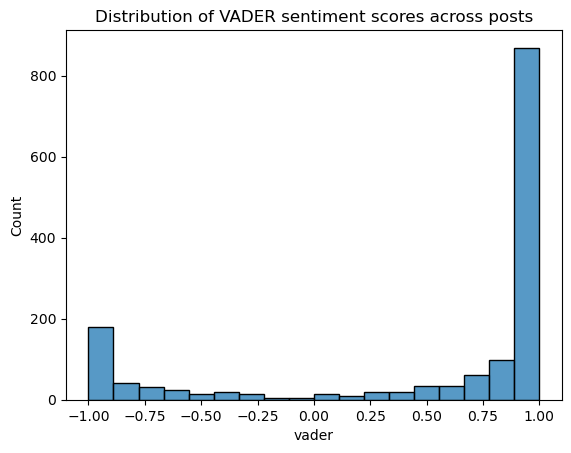

In [89]:
comments = df['combined_text']
universities = df['university']
vader_df = evalsentences(comments, universities, to_df = True, columns = ['comments', 'vader', 'university_name'])

# See distribution of sentiment across posts
sns.histplot(vader_df['vader'])
plt.title('Distribution of VADER sentiment scores across posts')

In [90]:
# Set option to show longer comments
pd.set_option('display.max_colwidth', 100)

# Add flair back in
vader_df['flair'] = df['flair']

# See what percent of comments are rated negative from VADER by flair
vader_df['is_neg'] = vader_df['vader'] < 0

percent_neg = (vader_df.groupby('flair')['is_neg']
               .mean()
               .round(2) 
               ).sort_values(ascending = False)

percent_neg

flair
News          0.45
Humour        0.23
Discussion    0.22
Academics     0.18
Other         0.18
Advice        0.14
HQ Post       0.14
Courses       0.05
Name: is_neg, dtype: float64

## PMI

In [ ]:
import math
import numpy as np

def calcpmi(df, topk_words, gt_sentiment, label_column, smoothing = 1):

    # Number of observations
    n = len(df)
    label_mask = df[label_column] == gt_sentiment

    pmi_scores = []

    # Add smoothing to avoid log(0)
    px = label_mask.sum() + smoothing

    # Math for pmi
    for word, _ in topk_words:

        word_mask = df[word] == True

        py = word_mask.sum() + smoothing

        pxy = (label_mask & word_mask).sum() + smoothing

        pmi = np.log((pxy * n) / (px*py))

        pmi_scores.append((word, pmi))
    
    return pd.DataFrame(pmi_scores, columns = ['word', 'pmi']).set_index('word')
 

In [105]:
# Create pmi df
pmi_df = pd.concat([mi_df, vader_df[['is_neg', 'university_name']]], axis = 1)

# Get top pmi for words and negative sentiment across all posts
calcpmi(pmi_df, top_500, 'negative', 'is_neg').sort_values(by = 'pmi', ascending= False).head(10)

,pmi
word,
university,7.303170
israel,4.412798
pharmacy,4.084294
roommate,3.837434
indigenous,3.806662
wage,3.614291
vaccine,3.589598
protest,3.589598
china,3.295837


### Investigating words associated with negative sentiment by flair at each uni

UofT

In [116]:
uoft_pmi = pmi_df[pmi_df['university_name'] == 'UofT']

for flair in uoft_pmi['flair'].unique():
    print(f'------{flair}-------')
    print(calcpmi(uoft_pmi[uoft_pmi['flair'] == flair], top_500, 'negative', 'is_neg').sort_values(by = 'pmi', ascending= False).head(10))

------Discussion-------
                 pmi
word                
university  4.543295
roommate    3.850148
cheating    2.597385
pharmacy    2.597385
vancouver   2.597385
vaccine     2.597385
israel      2.597385
bus         2.597385
indigenous  2.463853
meme        2.463853
------Humour-------
                 pmi
word                
university  6.236370
israel      6.236370
vancouver   5.137757
wage        4.850075
pharmacy    4.626932
indigenous  4.626932
protest     4.626932
roommate    4.290459
bus         4.156928
vaccine     4.156928
------News-------
                 pmi
word                
university  3.555348
english     3.555348
tip         3.555348
sleep       3.555348
assignment  3.555348
pharmacy    3.555348
cheating    2.862201
cheat       2.862201
chinese     2.862201
library     2.456736
------Other-------
                 pmi
word                
university  5.068904
israel      4.375757
vaccine     4.375757
pharmacy    3.970292
vancouver   3.970292
indigenous  3.97

In [118]:
ubc_pmi

,flair,people,like,student,get,year,one,time,would,think,...,finish,vancouver,process,walk,clear,behind,racist,winter,is_neg,university_name
998,Discussion,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,1,True,UBC
999,Humour,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,False,UBC
1000,Humour,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,False,UBC
1001,Humour,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,False,UBC
1002,Humour,1,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,True,UBC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,Discussion,1,1,0,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,False,UBC
1988,Humour,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,False,UBC
1989,Humour,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,True,UBC
1990,Humour,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,False,UBC


In [117]:
ubc_pmi = pmi_df[pmi_df['university_name'] == 'UBC']

for flair in ubc_pmi['flair'].unique():
    print(f'------{flair}-------')
    print(calcpmi(ubc_pmi[ubc_pmi['flair'] == flair], top_500, 'negative', 'is_neg').sort_values(by = 'pmi', ascending= False).head(10))

------Discussion-------
                 pmi
word                
university  4.859812
israel      4.859812
pharmacy    3.250374
toronto     3.250374
protest     3.068053
roommate    2.662588
china       2.461917
vaccine     2.461917
wage        2.374906
uoft        2.374906
------Humour-------
                 pmi
word                
israel      6.109248
university  6.109248
pharmacy    5.010635
indigenous  4.722953
roommate    4.499810
vaccine     4.499810
police      4.317488
protest     4.317488
china       4.163337
toronto     4.163337
------News-------
                 pmi
word                
sometimes   2.639057
culture     2.639057
library     2.639057
uoft        2.639057
gpa         2.639057
sleep       2.639057
university  2.639057
english     2.639057
toronto     2.639057
finish      2.639057


In [119]:
complaint_keywords = ['hate', 'terrible', 'awful', 'useless', 'complain', 'suck', 'scam', 'trash', 'unfair', 'lazy']

df['is_complaint'] = df['lemmatized_tokens'].apply(lambda tokens: any(word in complaint_keywords for word in tokens))

In [122]:
complaints_df = df[df['is_complaint'] == True]
complaints_df

,date_created,title,description,comments,upvotes,flair,university,combined_text,lemmatized_tokens,is_complaint
1,2024-11-08 03:24:09,[ Removed by Reddit ],[ Removed by Reddit on account of violating the [content policy](/help/contentpolicy). ],"['Ik this man, he’s getting cooked. Maybe uoft won’t do anything but it’s over for him and his s...",2939,Discussion,UofT,"['ik this man, he’s getting cooked. maybe uoft won’t do anything but it’s over for him and his s...","[man, getting, cooked, maybe, uoft, anything, social, life, esp, w, apparently, deleted, twitter...",True
2,2020-11-13 19:48:06,I want a ps5,NaN,"['i LOVE how low effort this looks', 'pain', 'loool u made my day..', 'Those boys and scalpers ...",2749,Humour,UofT,"i want a ps5 ['i love how low effort this looks', 'pain', 'loool u made my day..', 'those boys...","[want, love, low, effort, look, u, made, day, boy, scalper, really, took, thing, quick, shopper,...",True
4,2025-05-14 00:11:02,University of Toronto Faculty Association votes to divest from Israel,NaN,"['Big W, honestly im surprised', 'W faculty', 'Honestly amazing to hear!', 'Proud of my alma mat...",2163,News,UofT,"uoft faculty association votes to divest from israel ['big w, honestly im surprised', 'w facult...","[uoft, faculty, association, vote, divest, israel, w, honestly, im, surprised, w, faculty, amazi...",True
7,2024-05-29 21:56:51,Lady drives into cement in front of St George station 😭,NaN,"['Thank you for posting concrete evidence of her actions', 'I always wonder how these dumbasses ...",1905,Humour,UofT,lady drives into cement in front of st george station 😭 ['thank you for posting concrete eviden...,"[lady, drive, cement, front, st, george, station, posting, concrete, evidence, action, always, w...",True
9,2024-11-01 19:56:49,i walked 80 kilometers and 107000 steps for 24 hours straight to mcmaster university (from utsg),posting this to show off my achievements. this walk was really painful and i’m not 100% sure it ...,['Lol I’ve done utsg to utm but all the way to McMaster is quite mental. We could’ve tried toget...,1842,Other,UofT,i walked 80 kilometers and 107000 steps for 24 hours straight to mcmaster university (from utsg)...,"[walked, kilometer, step, hour, straight, mcmaster, university, utsg, posting, show, achievement...",True
...,...,...,...,...,...,...,...,...,...,...
2015,2019-12-15 11:45:42,mcgill subreddit bingo: finals edition,NaN,"['Holy shit, you have accurately described all the posts on this sub', 'Amazing', 'this is it ch...",615,HQ Post,McGill,"mcgill subreddit bingo: finals edition ['holy shit, you have accurately described all the posts...","[mcgill, subreddit, bingo, final, edition, shit, accurately, described, post, sub, chief, sexual...",True
2125,2019-04-26 23:49:25,My unsent letter to fellow McGillians,"So I am graduating — 4 years, I guess last week, last exam, this is it. Since I am no valedictor...","['Im not crying, you’re crying', ""> Take a deep breath, and keep count, because it’s going to go...",379,HQ Post,McGill,"my unsent letter to fellow mcgillians so i am graduating — 4 years, i guess last week, last exam...","[unsent, letter, fellow, mcgillians, graduating, year, guess, last, week, last, exam, since, val...",True
2352,2020-08-27 16:22:19,Please report people that are ignoring quarantine rules,LINK BELOW\r\n\r\nThere are many reports of parties and „new arrivals“ that are willfully ignori...,"['[deleted]', ""Snitching on people violating the quarantine act could literally save lives. The ...",264,HQ Post,McGill,please report people that are ignoring quarantine rules link below\r\n\r\nthere are many reports...,"[please, report, people, ignoring, quarantine, rule, link, many, report, party, new, arrival, wi...",True
2665,2020-04-24 22:36:39,Do Not Rent Thread 2020,"Hi all,\r\n\r\nI assume I'm not the only one worrying about where I am going to live next year. ...","[""Don't rent anything from Yuliv! They have punch-code locks instead of keys, and all of t